We want to know how our best performing model performs on twitter data: 

In [5]:
import pickle
import fasttext


In [6]:
with open("/home/peterr/macocu/taskB/data/final/twitter_full_ds.pickle", "rb") as f:
    dataset = pickle.load(f)

In [7]:
texts, languages = [], []
for user, payload in dataset.items():
    tweets = payload["tweets"]
    lang = payload["language"]
    texts.extend(tweets)
    languages.extend([lang]*len(tweets))


In [8]:
import pandas as pd
df = pd.DataFrame(data={"text": texts, "labels": languages})
df.head()

,text,labels
0,Hahahaha! i ja iz pera Sjajno!,hr
1,"Kruha & Igara, plakat koji sam dizajnirao za p...",hr
2,'Kruha & Igara' « via,hr
3,"""Habitat Pet Kindergarden Visual Identity"", a ...",hr
4,"Novi vizualni identitet je u portfoliju. ""Habi...",hr


In [9]:
model = fasttext.load_model("/home/peterr/macocu/taskB/data/models/fasttext_4.bin")

In [13]:
model.predict("Saobračajna avarija")

(('__label__sr',), array([0.77856201]))

In [21]:
model.predict(df.text.values.tolist()[:3])[0]

[['__label__sr'], ['__label__sr'], ['__label__sr']]

In [23]:
y_pred = model.predict(df.text.str.replace("\n", "").values.tolist())

In [29]:
predicted_languages = [i[0][-2:] for i in y_pred[0]]
df["y_pred"] = predicted_languages

In [40]:
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

macro = f1_score(df.labels, df.y_pred, labels=[
                 "hr", "sr", "bs", "me"], average="macro")
micro = f1_score(df.labels, df.y_pred, labels=[
                 "hr", "sr", "bs", "me"],  average="micro")
acc = accuracy_score(df.labels, df.y_pred)
print(f"Macro f1: {macro:0.3}\nMicro f1: {micro:0.3}\nAccuracy: {acc:0.3}")


Macro f1: 0.262
Micro f1: 0.42
Accuracy: 0.42


In [32]:
df.groupby("labels").count()

,text,y_pred
labels,,
bs,47997,47997
hr,54174,54174
me,39783,39783
sr,248314,248314


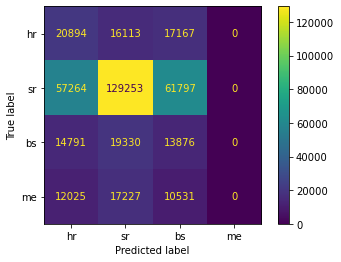

In [37]:
cm = confusion_matrix(df.labels, df.y_pred, labels=[
                 "hr", "sr", "bs", "me"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[
                 "hr", "sr", "bs", "me"])
disp.plot()
plt.savefig("images/SETimes_model_on_twitter_CM.png")
plt.show()
